In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import datetime 
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import r2_score

In [9]:
desks = pd.read_csv("desks.csv")

desks.head()

,id,building,floor,orientation,deskNo
0,127,A,1,NE,20
1,128,A,1,NE,19
2,129,A,1,NE,17
3,130,A,1,NE,18
4,131,A,1,NE,16


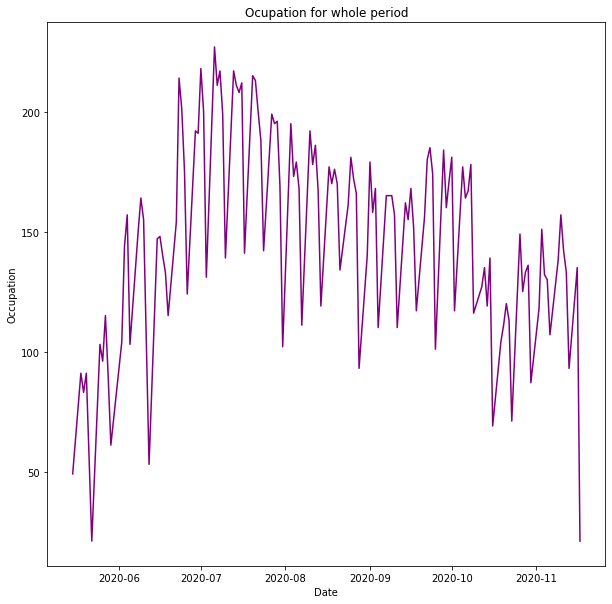

,dateBegin,count
0,20200515.0,49
1,20200518.0,91
2,20200519.0,83
3,20200520.0,91
4,20200522.0,21
...,...,...
125,20201111.0,142
126,20201112.0,133
127,20201113.0,93
128,20201116.0,135


In [24]:
deskusage=pd.read_csv("export_deskusage.csv")
deskusage.head()

dfu=pd.DataFrame(deskusage)

dfu['usageBegin']=pd.to_datetime(dfu.usageBegin)
dfu['usageEnd']=pd.to_datetime(dfu.usageEnd)
dfu['weekday']= pd.to_datetime(dfu['usageBegin']).dt.dayofweek

dfu=dfu.drop(['lastScan','lastUpdate'], axis=1)
dfu = dfu[~dfu["deskNo"].isin([98,99,198,198,298,398,399,498,499,598,599])]
dfu = dfu[~dfu["weekday"].isin([5,6])]

duration=dfu['duration']=(dfu['usageEnd']-dfu['usageBegin'])

dfu=dfu.loc[dfu['duration']>pd.Timedelta(3, unit='h')]

dfu['dateBegin']=pd.to_datetime(dfu.usageBegin).dt.date
dfu['timeBegin']=pd.to_datetime(dfu.usageBegin).dt.time

#df['days'] = float(df['delta'].dt.days)


#dfu['weekday'].value_counts()
#
dfu['one']=1

#df = dfu.groupby('floor', 'dateBegin', 'building')['floor', 'dateBegin', 'building'].transform('count')

gruppiert= dfu.groupby(['dateBegin', 'building']).count()['one'].to_frame('count').reset_index()



gruppiertdatum=dfu.groupby(['dateBegin']).count()['one'].to_frame('count').reset_index()


gruppiert['weekday']= pd.to_datetime(gruppiert['dateBegin']).dt.dayofweek


#gruppiertdatum['dateBegin']=pd.to_datetime(gruppiertdatum.dateBegin).dt.date

#gruppiertdatum["dateBegin"] = gruppiertdatum["dateBegin"].convert_objects(convert_numeric=True)

#def datetime_to_float(d):
 #   return d.timestamp()



#print(gruppiert.head()) 
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

#plotdf = gruppiertdatum.loc[gruppiertdatum['dateBegin']>'2020-07-01' and gruppiertdatum['dateBegin']<'2020-07-30']

#gruppiertdatum['dateBegin']=pd.to_datetime(gruppiertdatum.dateBegin)

#plotdf = gruppiertdatum[(gruppiertdatum['dateBegin'].Timestamp >= '2020-07-01') 
#& (gruppiertdatum['dateBegin'].Timestamp <= '2020-08-01')]

#print(gruppiertdatum['dateBegin'].dtypes)

# Add x-axis and y-axis
ax.plot('dateBegin',
        'count',
        color='purple', data=gruppiertdatum)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Occupation",
       title="Ocupation for whole period")

plt.show()


gruppiertdatum['dateBegin'] = gruppiertdatum['dateBegin'].astype(str)

gruppiertdatum['dateBegin'] = (gruppiertdatum['dateBegin'].str.split()).apply(lambda x: float(x[0].replace('-', '')))

#gruppiertdatum['dateBegin'] = gruppiertdatum['dateBegin'].dt.strftime("%Y-%m-%d")

gruppiertdatum.to_csv('gruppiertdatum3.csv')

#gruppiertdatum['dateBegin'] = gruppiertdatum['dateBegin'].values.astype(np.float) / 10**9
gruppiertdatum


In [14]:
birth=pd.read_csv("daily-total-female-births.csv")


df1=pd.DataFrame(birth)
df1.dtypes


df1

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [14]:
#Anteil in Prozent

if (gruppiert["building"]=="A").any():
    gruppiert["Anteil"]=gruppiert["count"] /148*100
else:
    gruppiert["Anteil"]=gruppiert["count"] /308*100

gruppiert


,dateBegin,building,count,Anteil,weekday
0,2020-05-15,A,47,31.756757,4
1,2020-05-15,B,2,1.351351,4
2,2020-05-18,A,60,40.540541,0
3,2020-05-18,B,31,20.945946,0
4,2020-05-19,A,56,37.837838,1
...,...,...,...,...,...
255,2020-11-13,B,47,31.756757,4
256,2020-11-16,A,53,35.810811,0
257,2020-11-16,B,82,55.405405,0
258,2020-11-17,A,9,6.081081,1


,dateBegin,count
0,2020-05-15,49
1,2020-05-18,91
2,2020-05-19,83
3,2020-05-20,91
4,2020-05-22,21
...,...,...
125,2020-11-11,142
126,2020-11-12,133
127,2020-11-13,93
128,2020-11-16,135


In [15]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
index_list = gruppiertdatum['count'].tolist() 

data = series_to_supervised(index_list, 10) 

print(data)

data.to_excel('saved_file.xlsx', index = False)

type(values)

     var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  \
10         49.0       91.0       83.0       91.0       21.0      103.0   
11         91.0       83.0       91.0       21.0      103.0       96.0   
12         83.0       91.0       21.0      103.0       96.0      115.0   
13         91.0       21.0      103.0       96.0      115.0       90.0   
14         21.0      103.0       96.0      115.0       90.0       61.0   
..          ...        ...        ...        ...        ...        ...   
125       133.0      136.0       87.0      118.0      151.0      132.0   
126       136.0       87.0      118.0      151.0      132.0      130.0   
127        87.0      118.0      151.0      132.0      130.0      107.0   
128       118.0      151.0      132.0      130.0      107.0      138.0   
129       151.0      132.0      130.0      107.0      138.0      157.0   

     var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)  var1(t)  
10        96.0      115.0       90.0       61.0     

numpy.ndarray

In [53]:
gruppiertdatum['count']

0       49
1       91
2       83
3       91
4       21
      ... 
125    142
126    133
127     93
128    135
129     21
Name: count, Length: 130, dtype: int64

>expected=165.0, predicted=163.1
>expected=157.0, predicted=167.1
>expected=110.0, predicted=115.5
>expected=162.0, predicted=146.3
>expected=155.0, predicted=164.6
>expected=168.0, predicted=162.0
>expected=152.0, predicted=158.2
>expected=117.0, predicted=123.2
>expected=156.0, predicted=156.1
>expected=180.0, predicted=158.8
>expected=185.0, predicted=162.5
>expected=174.0, predicted=164.0
>expected=101.0, predicted=127.9
>expected=184.0, predicted=157.7
>expected=160.0, predicted=173.6
>expected=171.0, predicted=169.3
>expected=181.0, predicted=166.3
>expected=117.0, predicted=119.6
>expected=177.0, predicted=170.0
>expected=164.0, predicted=170.4
>expected=167.0, predicted=171.3
>expected=178.0, predicted=168.9
>expected=116.0, predicted=118.1
>expected=127.0, predicted=169.3
>expected=135.0, predicted=152.7
>expected=119.0, predicted=146.0
>expected=139.0, predicted=136.6
>expected=69.0, predicted=117.5
>expected=104.0, predicted=114.8
>expected=111.0, predicted=113.0
>expected=1

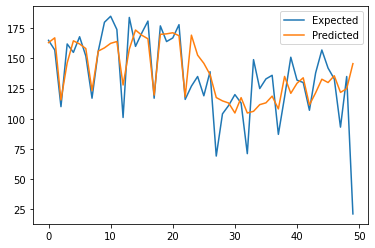

In [38]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('gruppiertdatum3.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=15)
# evaluate
mae, y, yhat = walk_forward_validation(data, 50)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()



In [64]:
series = read_csv('gruppiertdatum.csv', header=0, index_col=0)
values = series.values
type(series)

pandas.core.frame.DataFrame

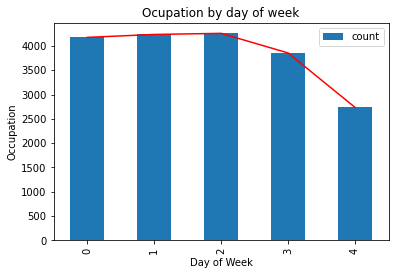

In [60]:
gruppiertweekday=dfu.groupby(['weekday']).count()['one'].to_frame('count').reset_index()

#fig, ax = plt.subplots(figsize=(10, 10))

ax = gruppiertweekday.plot.bar('weekday', 'count')
ax.plot('weekday',
        'count',
        color='red', data=gruppiertweekday)

# Set title and labels for axes
ax.set(xlabel="Day of Week",
       ylabel="Occupation",
       title="Ocupation by day of week")

plt.show()


In [4]:

gruppiertdatum.sort_values(by='count', ascending=True)

,dateBegin,count
129,2020-11-17,21
4,2020-05-22,21
0,2020-05-15,49
17,2020-06-12,53
9,2020-05-29,61
...,...,...
43,2020-07-20,215
38,2020-07-13,217
35,2020-07-08,217
30,2020-07-01,218


In [84]:

#str(gruppiertdatum['dateBegin'].dt.month)+"/"+str(gruppiertdatum['dateBegin'].dt.day)+"/"+str(gruppiertdatum['dateBegin'].dt.year)

#date_object = datetime.strptime(date_string, "%d %B, %Y")

gruppiertdatum.dtypes

print("Mean = ",gruppiertdatum['count'].mean())


Mean =  148.14615384615385


In [10]:

# stationäre Zeitreihe eine ist, deren Mittelwert und Varianz über die Zeit konstant ist. 

############### checking for stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)





In [11]:
#p-value should be <0.05

ad_test(gruppiertdatum['count'])

1. ADF :  -1.5900301827927044
2. P-Value :  0.4885997403204372
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


In [12]:
gruppiertdatum['count'] 

1       91
2       83
3       91
4       21
5      103
      ... 
125    142
126    133
127     93
128    135
129     21
Name: count, Length: 129, dtype: int64

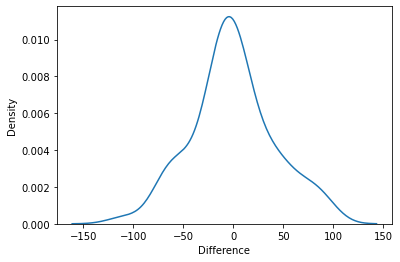

Mean =  149.3671875
Std =  41.35859527415288


In [13]:
gruppiertdatum['Difference'] = gruppiertdatum['count'] - gruppiertdatum['count'].shift(1)

#todo: hist und distr linie auf einer Grafik abbilden

gruppiertdatum=gruppiertdatum.dropna()

sns.kdeplot(data=gruppiertdatum, x ='Difference')
#plt.hist(gruppiertdatum['Difference'])
plt.show()

print("Mean = ",gruppiertdatum['count'].mean())
print("Std = ",gruppiertdatum['count'].std())

In [14]:

ad_test(gruppiertdatum['Difference'])



1. ADF :  -3.6458994009155856
2. P-Value :  0.004941784449652522
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


In [15]:
#parametern wählen

from pmdarima import auto_arima

stepwise_fit = auto_arima(gruppiertdatum['Difference'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1320.237, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1296.333, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1264.427, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1318.259, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1266.366, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1266.334, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1262.461, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1264.401, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1264.369, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1294.346, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.513 seconds


In [16]:
#split dataset
 
print(gruppiertdatum.shape)
train=gruppiertdatum.iloc[:-20]
test=gruppiertdatum.iloc[-20:]
print(train.shape,test.shape)



(128, 3)
(108, 3) (20, 3)


/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings

<AxesSubplot:>

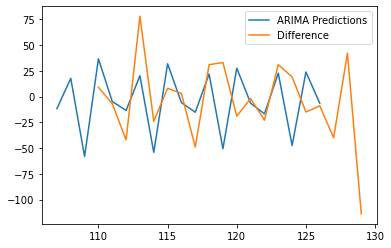

In [20]:

#p is the number of autoregressive terms,
#d is the number of nonseasonal differences needed for stationarity, and
#q is the number of lagged forecast errors in the prediction equation.


from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Difference'],order=(4,1,5))
model=model.fit()
model.summary()


start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Difference'].plot(legend=True)

In [18]:

print("Mean prdicted: ", pred.mean())
print("Mean test difference: ", test['Difference'].mean())
print("Mean train difference: ", train['Difference'].mean())



Mean prdicted:  0.3145161609064851
Mean test difference:  -4.5
Mean train difference:  0.18518518518518517


In [33]:
print("Std prdicted: ", pred.std())
print("Std test difference: ", test['Difference'].std())
print("Std train difference: ", train['Difference'].std())


Std prdicted:  32.497429068413346
Std test difference:  40.7527848580218
Std train difference:  41.822014177472205


In [22]:
r2_score(test['Difference'], pred)

0.34646071185566074

In [110]:

#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(gruppiertdatum["count"])
#plt.show()


#series =pd.read_csv('gruppiertdatum.csv', squeeze=True)


#import statsmodels.api as sm
#model=sm.tsa.statespace.SARIMAX(gruppiertdatum["count"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
#results=model.fit()
#gruppiertdatum['forecast']=results.predict(start=10,end=120,dynamic=True)
#gruppiertdatum[["count",'forecast']].plot(figsize=(12,8))



#from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(gruppiertdatum["count"],order=(1,1,1))
#model_fit=model.fit()
#model_fit.summary()

In [18]:
dfu

,deskId,building,floor,orientation,deskNo,usageBegin,usageEnd,weekday,duration,dateBegin,timeBegin,one
0,138,A,1,NE,8,2020-05-15 05:14:33.590,2020-05-15 14:01:56.180,4,0 days 08:47:22.590000,2020-05-15,05:14:33.590000,1
1,246,A,1,SW,15,2020-05-15 06:12:46.480,2020-05-15 14:46:23.080,4,0 days 08:33:36.600000,2020-05-15,06:12:46.480000,1
2,142,A,1,NE,4,2020-05-15 06:25:42.107,2020-05-15 10:36:14.703,4,0 days 04:10:32.596000,2020-05-15,06:25:42.107000,1
3,151,A,1,SE,37,2020-05-15 06:36:07.877,2020-05-15 12:59:45.413,4,0 days 06:23:37.536000,2020-05-15,06:36:07.877000,1
4,149,A,1,SE,39,2020-05-15 06:43:21.603,2020-05-15 14:29:41.640,4,0 days 07:46:20.037000,2020-05-15,06:43:21.603000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23712,529,B,5,SE,17,2020-11-17 08:15:00.633,2020-11-17 14:23:12.460,1,0 days 06:08:11.827000,2020-11-17,08:15:00.633000,1
23715,563,B,2,NE,20,2020-11-17 08:34:49.743,2020-11-17 14:27:52.263,1,0 days 05:53:02.520000,2020-11-17,08:34:49.743000,1
23720,169,A,1,SE,4,2020-11-17 09:20:08.327,2020-11-17 14:58:54.107,1,0 days 05:38:45.780000,2020-11-17,09:20:08.327000,1
23722,158,A,1,SE,18,2020-11-17 09:23:05.670,2020-11-17 12:43:04.057,1,0 days 03:19:58.387000,2020-11-17,09:23:05.670000,1


In [151]:
#dfu = dfu.drop(dfu.loc['duration']<pd.Timedelta(3, unit='h').index, inplace=True)

#df = df.drop(df.loc[i,'time']<df.loc[i-1,'time'].index)
#duration=dfu['duration']=(dfu['usageEnd']-dfu['usageBegin']).astype('timedelta64[D]')


#dfu['durationDays']=pd.to_datetime(dfu.duration).dt.day


#more=dfu.loc[dfu['duration']>0.0]

#dfu=dfu.loc[dfu['duration']>pd.Timedelta(1, unit='d')]


#for index, row in more.head().iterrows():
     # access data using column names
     #count
     #row['dateBegin']+=1
    #print(index, row['deskNo'], row['orientation'], row['floor'], row['building'], row['dateBegin'], row['duration'])

<function matplotlib.pyplot.show(close=None, block=None)>

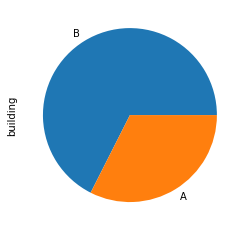

In [15]:

desks.building.value_counts(normalize=True)
desks.building.value_counts(normalize=True).plot.pie()
plt.show

In [18]:
df=pd.DataFrame(desks)

df['building'].value_counts()
#df['floor'].value_counts()
#A=df[df.building=="A"]
#A['floor'].value_counts()

B    308
A    148
Name: building, dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB
